## Выполненное домашнее задание №1 по машинному обучению

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/xomaiya/.conda/envs/ml/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cardio = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


    Попробуем соотнести цифры 1 и 2 с гендерами, указанными в колонке "gender". Для этого посмотрим на рост и вес по гендерам. Видим, что для гендера 2 в среднем и рост и вес больше, чем для гендера 1, поэтому можно сделать вывод, что гендер под номером 1 -- это женщины, а гендер под номером 2 -- мужчины

In [4]:
cardio.groupby('gender')['height'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,45530.0,161.355612,7.052726,55.0,157.0,161.0,166.0,250.0
2,24470.0,169.947895,7.228895,65.0,165.0,170.0,175.0,207.0


In [5]:
cardio.groupby('gender')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,45530.0,72.565605,14.238838,21.0,63.0,70.0,80.0,200.0
2,24470.0,77.257307,14.187636,10.0,68.0,75.0,85.0,200.0


    Из этих же таблиц видим, что количество женщин в датасете 45530, а количество мужчин 24470

In [6]:
cardio['BMI'] = cardio.weight / (cardio.height / 100) ** 2

In [7]:
sns.set(rc={'figure.figsize': (20, 9)})

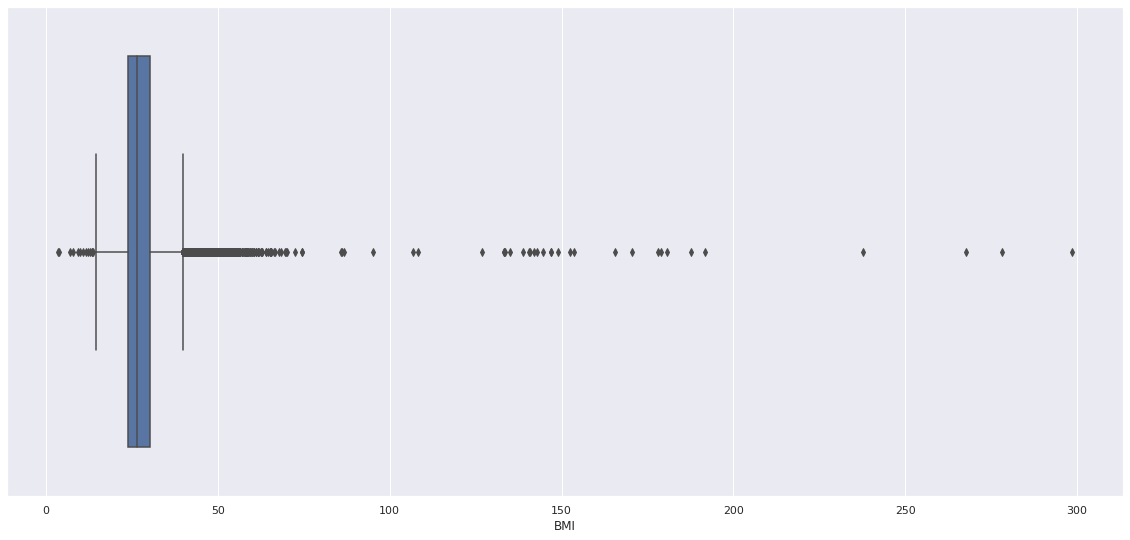

In [8]:
sns.boxplot(cardio['BMI'])

    Выбросы есть.

In [9]:
cardio_2 = pd.read_csv('cardio_train.csv', sep=';')

In [10]:
cardio_2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


    Процент людей, для которых значение диастолического давления выше, чем систолического

In [11]:
cardio_2[cardio_2.ap_lo > cardio_2.ap_hi].shape[0] / cardio_2.shape[0] * 100

1.7628571428571427

In [12]:
cardio_2 = cardio_2.drop(cardio_2[cardio_2.ap_lo <= cardio_2.ap_hi].index)

In [13]:
cardio_2['age_year'] = cardio_2.age // 325
cardio_2.age_year.describe()

count    1234.000000
mean       60.205835
std         7.382259
min        43.000000
25%        55.000000
50%        61.000000
75%        66.000000
max        72.000000
Name: age_year, dtype: float64

    Видим, что минимальное значение возраста 33 года, а максимальное 72 года. 
    Выделим возрастные группы: 'young' <= 40 лет, 'middle-aged' = 41-50 лет, 'senior' = 51-60, 'old' > 60

In [14]:
def age2age_group(age):
    if age <= 40:
        return 'young'
    if 40 < age <= 50:
        return 'middle-age'
    if 50 < age <= 60:
        return 'senior'
    else:
        return 'old'

In [15]:
cardio_2['age_group'] = cardio_2.age_year.map(age2age_group)

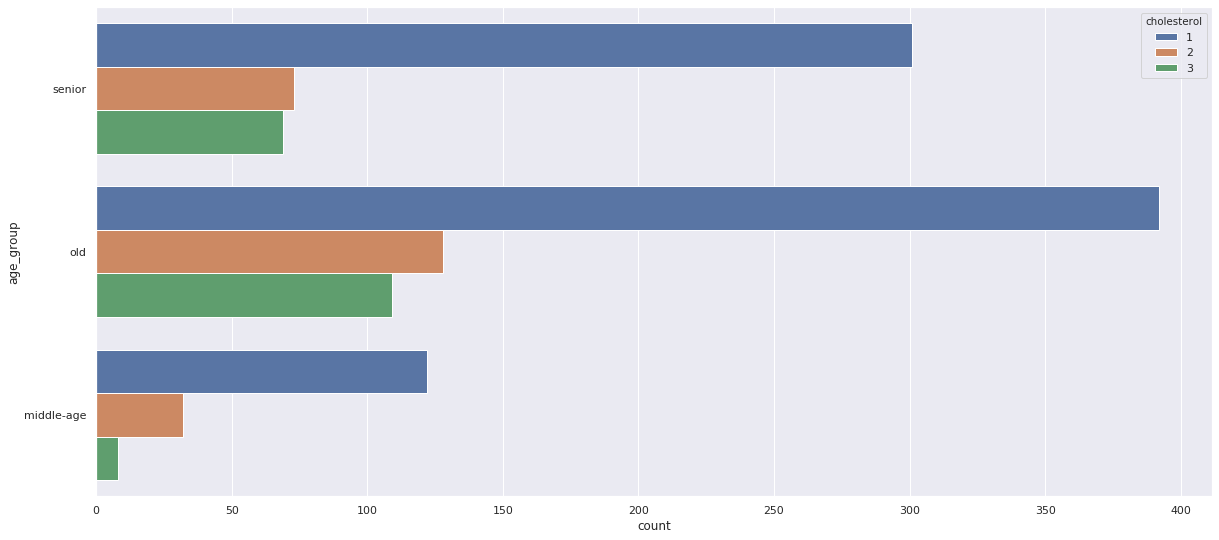

In [16]:
sns.countplot(y='age_group', hue='cholesterol', data=cardio_2);

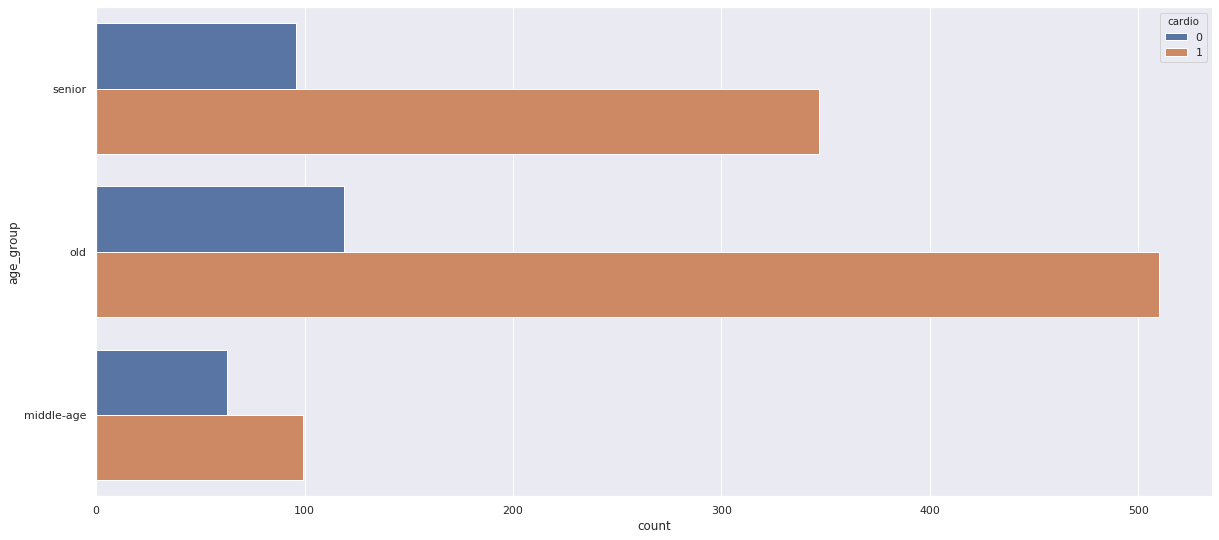

In [17]:
sns.countplot(y='age_group', hue='cardio', data=cardio_2)

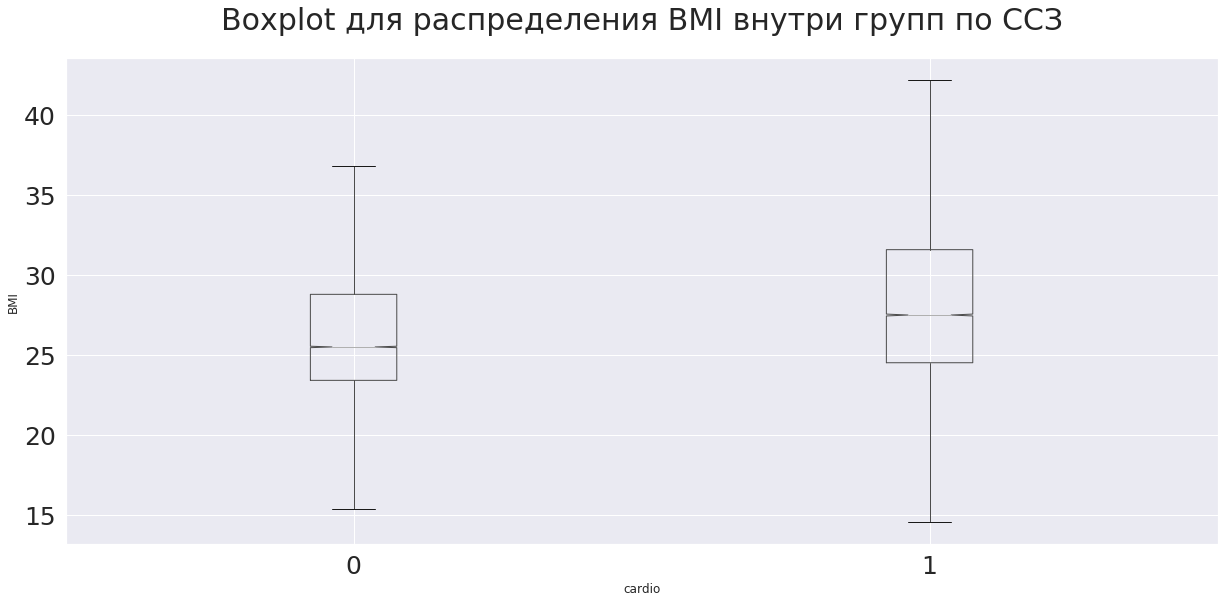

In [18]:
plt.rcParams.update({'font.size': 25})
cardio.boxplot('BMI', by='cardio', showfliers=False, notch=True, fontsize=25)
plt.title('')
plt.suptitle('Boxplot для распределения BMI внутри групп по ССЗ')
plt.xlabel('cardio')
plt.ylabel('BMI')
plt.show()

    Распределение примерно одинаковое, но по доверительному интервалу на медиану видно, что у больных ССЗ значимо больше BMI